In [29]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
#no of QDs
n = 24
#no of permanent charges
N = 12
#radius of QD setup R
R = 3
#radius of the inner disc
Rp = 2
r0 = R - Rp
#Coulomb constant k = 1/4pi* eps0
k = 0.8988e10
#Charge of QD, PC
e = 1.60217662e-19
p_ch = 2*e

In [31]:
QDs = {}
for i in range(n):
    fi = (2*math.pi/n)*i
    x = R*math.cos(fi)
    y = R*math.sin(fi)
    if i%2 == 0:
        q_ch = 0
    else:
        q_ch = -2*e
    QDs.update({i:[x,y,fi,q_ch]})   #Gives [x-coord, y-coord, charge]

In [32]:
PCs = {}
for i in range(N):
    theta = (2*math.pi/N)*i
    xp = Rp*math.cos(theta)
    yp = Rp*math.sin(theta)
    PCs.update({i:[xp,yp,theta, p_ch]})   #Gives [x-coord, y-coord, charge]

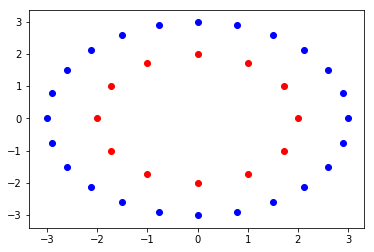

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
for x in QDs.keys():
    ax.scatter(QDs[x][0], QDs[x][1], color ='b')
for y in PCs.keys():
    ax.scatter(PCs[y][0], PCs[y][1], color ='r')
plt.show()

In [39]:
F_c = 0; #To work out force in polar I need to know distance from the PC to each QD
F_t = 0
for i in range(n):
    Q = QDs[i]
    ri = math.sqrt(2*R*(R-r0)*(1-math.cos(QDs[i][2]))+r0**2)
    F_c += k*PCs[0][3]*Q[3]/(ri**2)
    d = 2*R*math.sin(QDs[i][2]/2)
    alpha = math.acos(((r0**2)+(ri**2)-(d**2))/(2*r0*ri))
    F_t += F_c*math.sin(alpha)
print F_t

-1.72721042844e-26
